In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.stats import norm, pearsonr, multivariate_normal

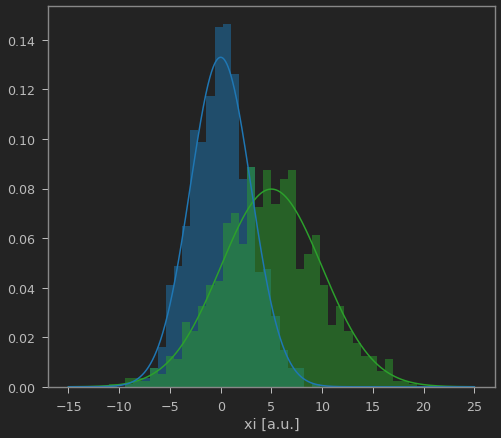

correlation coefficient: -0.03


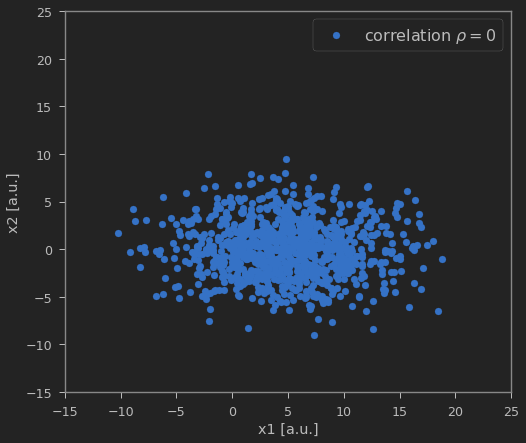

In [2]:
mu1 = 5.0
mu2 = 0.0

sigma1 = 5
sigma2 = 3

# rvs seed
np.random.seed(0)

x1 = np.random.normal(mu1, sigma1, 1000)
x2 = np.random.normal(mu2, sigma2, 1000)

edges = np.linspace(-15, 25, 51)
plt.hist(x2, bins=edges, alpha=0.5, density = True, color='tab:blue')
plt.hist(x1, bins=edges, alpha=0.5, density = True, color='tab:green')

xval = np.linspace(-15, 25 ,1000)
yval1 = norm.pdf(xval, mu1, sigma1)
yval2 = norm.pdf(xval, mu2, sigma2)

plt.plot(xval, yval1, color='tab:green')
plt.plot(xval, yval2, color='tab:blue')
plt.xlabel("xi [a.u.]")
plt.show()

plt.scatter(x1, x2, label='correlation $\\rho=0$')
plt.xlabel("x1 [a.u.]")
plt.ylabel("x2 [a.u.]")

plt.xlim([-15, 25])
plt.ylim([-15, 25])

plt.legend(fontsize=16)

print(f"correlation coefficient: {pearsonr(x1, x2)[0]:.2f}")
plt.show()

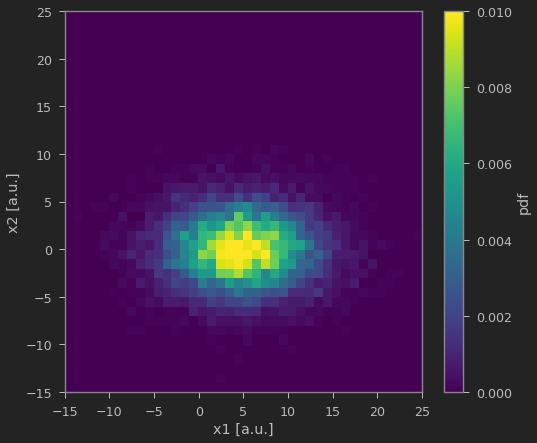

In [3]:
# generate some more samples
np.random.seed(0)

x1 = np.random.normal(mu1, sigma1, 10000)
x2 = np.random.normal(mu2, sigma2, 10000)

fig, ax = plt.subplots()

edges = np.linspace(-15, 25, 41)
h = ax.hist2d(x1, x2, bins=[edges]*2, density=True, norm=Normalize(vmin=0.0, vmax = 0.01))
ax.set_xlabel("x1 [a.u.]")
ax.set_ylabel("x2 [a.u.]")

cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label("pdf")

plt.show()

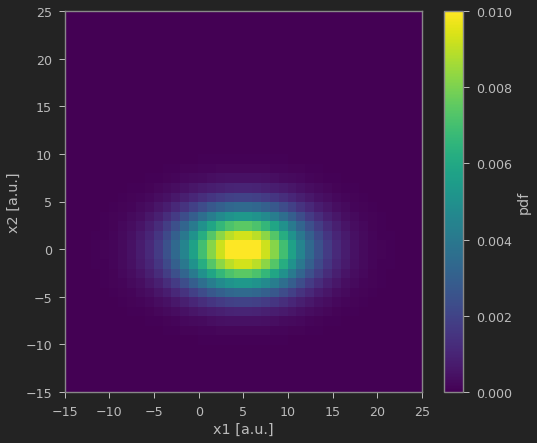

In [4]:
# plot pdf

centers = 0.5 * (edges[1:] + edges[:-1])
xv, yv = np.meshgrid(centers, centers, sparse=False, indexing='xy')
pdf_vals = norm.pdf(xv, mu1, sigma1) * norm.pdf(yv, mu2, sigma2)

fig, ax = plt.subplots()
h = ax.hist2d(xv.flatten(), yv.flatten(), bins=[edges]*2, weights = pdf_vals.flatten(), norm=Normalize(vmin=0.0, vmax = 0.01))
ax.set_xlabel("x1 [a.u.]")
ax.set_ylabel("x2 [a.u.]")

cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label("pdf")

plt.show()


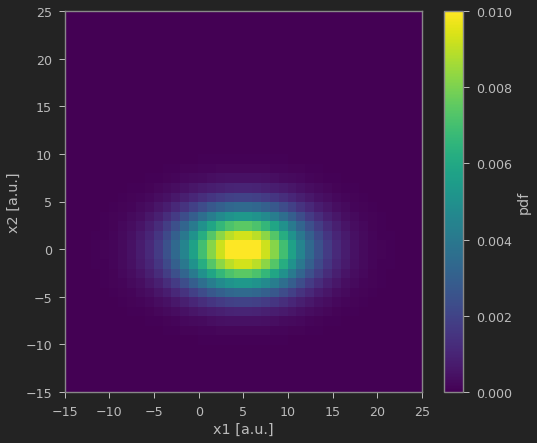

In [5]:
centers = 0.5 * (edges[1:] + edges[:-1])
xv, yv = np.meshgrid(centers, centers, sparse=False, indexing='xy')
pos = np.stack([xv.flatten(), yv.flatten()], axis=1)

mu = [mu1, mu2]
cov_matrix = np.identity(2) # identity matrix
cov_matrix[0, 0] = sigma1**2
cov_matrix[1, 1] = sigma2**2

pdf_vals = multivariate_normal.pdf(pos, mean=mu, cov=cov_matrix)

fig, ax = plt.subplots()
h = ax.hist2d(xv.flatten(), yv.flatten(), bins=[edges]*2, weights = pdf_vals.flatten(), norm=Normalize(vmin=0.0, vmax = 0.01))
ax.set_xlabel("x1 [a.u.]")
ax.set_ylabel("x2 [a.u.]")

cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label("pdf")

plt.show()

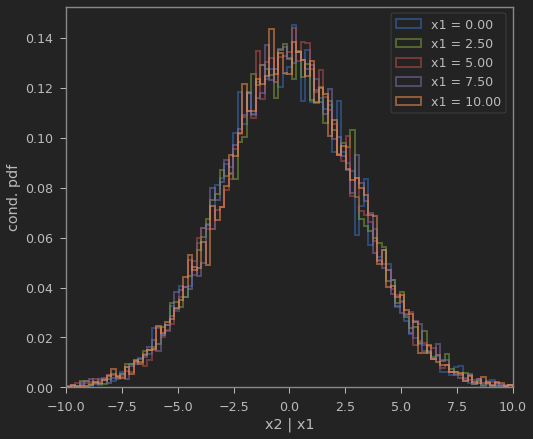

In [6]:
# conditional distributions
np.random.seed(0)

x1 = np.random.normal(mu1, sigma1, 1000000)
x2 = np.random.normal(mu2, sigma2, 1000000)

eps = 0.1
edges = np.linspace(-10,10, 100)

for cond_val in np.linspace(0, 10, 5):
    
    idx = x1 < cond_val + eps
    idx = np.logical_and(idx, x1 > cond_val - eps)
    
    plt.hist(x2[idx], bins=edges, density=True, alpha=0.5, histtype='step', linewidth=2, label=f"x1 = {cond_val:.2f}")
    
    
plt.xlim([-10, 10])
plt.legend()
plt.xlabel("x2 | x1")
plt.ylabel("cond. pdf")
plt.show()

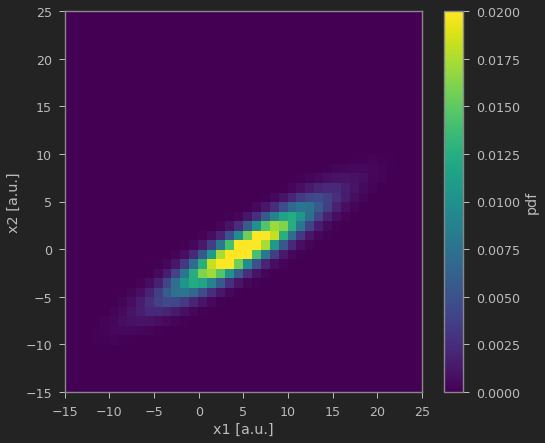

In [12]:
# now let's do the correlated case
corr = 0.9
cov = corr * sigma1 * sigma2 
cov_matrix[0, 1] = cov
cov_matrix[1, 0] = cov

pdf_vals = multivariate_normal.pdf(pos, mean=mu, cov=cov_matrix)
edges = np.linspace(-15, 25, 41)

fig, ax = plt.subplots()
h = ax.hist2d(xv.flatten(), yv.flatten(), bins=[edges]*2, weights = pdf_vals.flatten(), norm=Normalize(vmin=0.0, vmax = 0.02))
ax.set_xlabel("x1 [a.u.]")
ax.set_ylabel("x2 [a.u.]")

cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label("pdf")

plt.show()

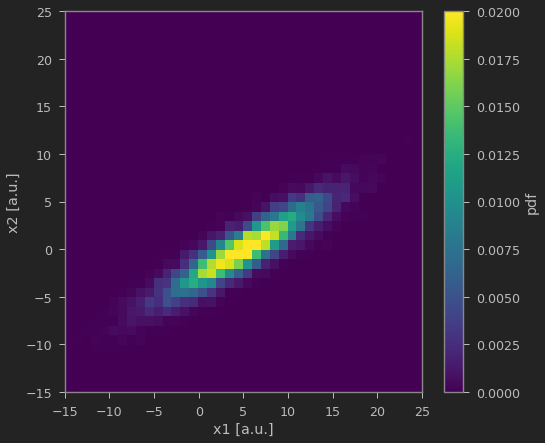

In [8]:
np.random.seed(0)
random_vectors = np.random.multivariate_normal(mu, cov_matrix, 10000)

x1 = random_vectors[:, 0]
x2 = random_vectors[:, 1]

fig, ax = plt.subplots()

edges = np.linspace(-15, 25, 41)
h = ax.hist2d(x1, x2, bins=[edges]*2, density=True, norm=Normalize(vmin=0.0, vmax = 0.02))
ax.set_xlabel("x1 [a.u.]")
ax.set_ylabel("x2 [a.u.]")

cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label("pdf")

plt.show()

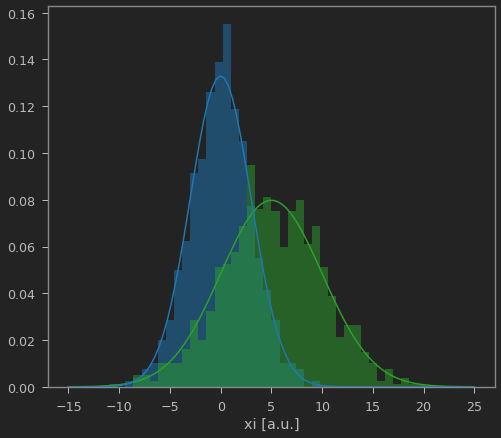

correlation coefficient: 0.90


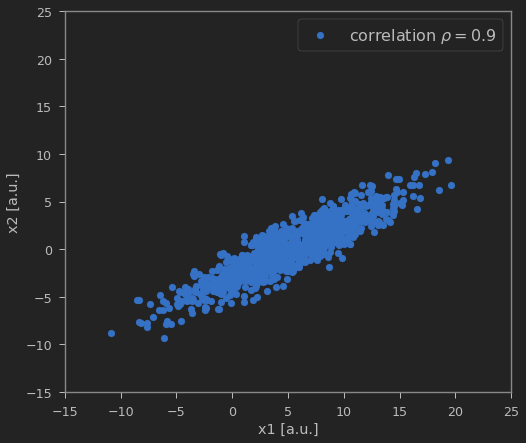

In [9]:
np.random.seed(0)
random_vectors = np.random.multivariate_normal(mu, cov_matrix, 1000)

x1 = random_vectors[:, 0]
x2 = random_vectors[:, 1]

edges = np.linspace(-15, 25, 51)
plt.hist(x2, bins=edges, alpha=0.5, density = True, color='tab:blue')
plt.hist(x1, bins=edges, alpha=0.5, density = True, color='tab:green')

xval = np.linspace(-15, 25 ,100)
yval1 = norm.pdf(xval, mu1, sigma1)
yval2 = norm.pdf(xval, mu2, sigma2)

plt.plot(xval, yval1, color='tab:green')
plt.plot(xval, yval2, color='tab:blue')
plt.xlabel("xi [a.u.]")
plt.show()

plt.scatter(x1, x2, label=f'correlation $\\rho={corr}$')
plt.xlabel("x1 [a.u.]")
plt.ylabel("x2 [a.u.]")

plt.xlim([-15, 25])
plt.ylim([-15, 25])

plt.legend(fontsize=16)

print(f"correlation coefficient: {pearsonr(x1, x2)[0]:.2f}")
plt.show()

In [10]:
# evaluate all possibilities at x = m
x = [mu1, mu2]

# without correlation
cov_matrix = np.identity(2)
cov_matrix[0, 0] = sigma1 ** 2
cov_matrix[1, 1] = sigma2 ** 2
print(multivariate_normal.pdf(x, mu, cov_matrix))
print(norm.pdf(x[0], mu[0], sigma1) * norm.pdf(x[1], mu[1], sigma2))

# now with correlation turned on
corr = 0.9
cov = corr * sigma1 * sigma2 
cov_matrix[0, 1] = cov
cov_matrix[1, 0] = cov
print(multivariate_normal.pdf(x, mu, cov_matrix))

0.010610329539459696
0.01061032953945969
0.024341765379036442


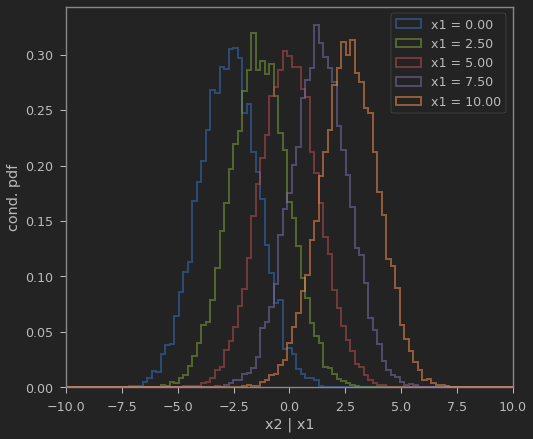

In [11]:
# conditional distributions
np.random.seed(0)
random_vectors = np.random.multivariate_normal(mu, cov_matrix, 1000000)

x1 = random_vectors[:, 0]
x2 = random_vectors[:, 1]

eps = 0.1
edges = np.linspace(-10,10, 100)

for cond_val in np.linspace(0, 10, 5):
    
    idx = x1 < cond_val + eps
    idx = np.logical_and(idx, x1 > cond_val - eps)
    
    plt.hist(x2[idx], bins=edges, density=True, alpha=0.5, histtype='step', linewidth=2, label=f"x1 = {cond_val:.2f}")
    
    
plt.xlim([-10, 10])
plt.legend()
plt.xlabel("x2 | x1")
plt.ylabel("cond. pdf")
plt.show()
